## Part 3
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

## Data description
* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYYMMDD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE
  otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [28]:
with open('ultimate_data_challenge.json') as f:
   df = json.load(f)

df1 = pd.DataFrame(df)

In [29]:
df1

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [31]:
#drop null values
df1.dropna(inplace = True)

In [32]:
df1

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0


In [35]:
#turn date columns to datetime
df1['signup_date'] = pd.to_datetime(df1['signup_date'])
df1['last_trip_date'] = pd.to_datetime(df1['last_trip_date'])

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    41445 non-null  object        
 1   trips_in_first_30_days  41445 non-null  int64         
 2   signup_date             41445 non-null  datetime64[ns]
 3   avg_rating_of_driver    41445 non-null  float64       
 4   avg_surge               41445 non-null  float64       
 5   last_trip_date          41445 non-null  datetime64[ns]
 6   phone                   41445 non-null  object        
 7   surge_pct               41445 non-null  float64       
 8   ultimate_black_user     41445 non-null  bool          
 9   weekday_pct             41445 non-null  float64       
 10  avg_dist                41445 non-null  float64       
 11  avg_rating_by_driver    41445 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [55]:
#this is the max date that the dataframe has. To check for active users use preceding 30 days from this date
last_date = max(df1['last_trip_date'])

In [38]:
df1

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0


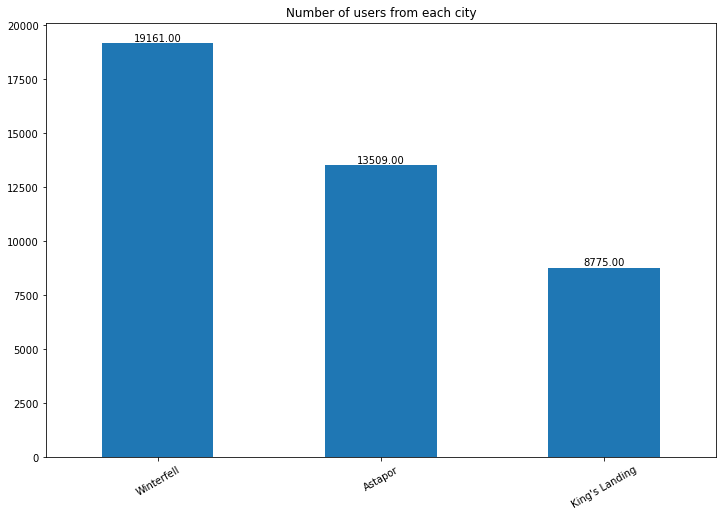

In [48]:
plt.figure(figsize=(12,8))
ax = df1['city'].value_counts().plot.bar()
plt.xticks(rotation=30)
plt.title('Number of users from each city')
rects = ax.patches

for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height +.01,
                '%.2f' %float(height),
                ha='center', va='bottom')

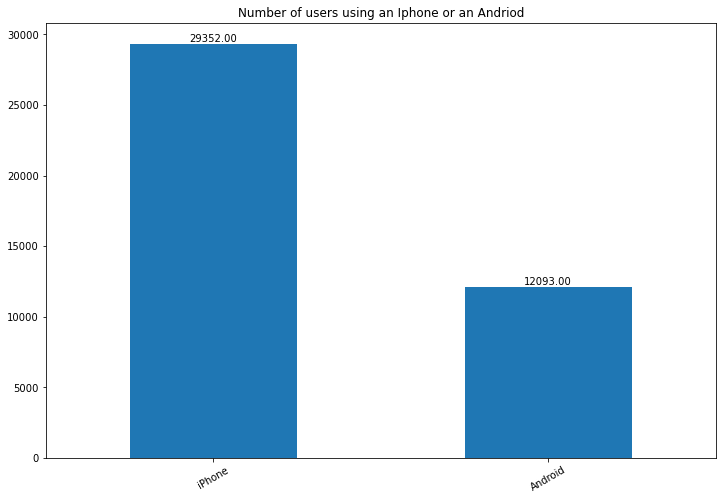

In [49]:
plt.figure(figsize=(12,8))
ax = df1['phone'].value_counts().plot.bar()
plt.xticks(rotation=30)
plt.title('Number of users using an Iphone or an Andriod')
rects = ax.patches

for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height +.01,
                '%.2f' %float(height),
                ha='center', va='bottom')

In [57]:
df1['active'] = 0

active = []

for x in df1['last_trip_date']:
    if((last_date-x).days <=30):
        active.append(1)
    else:
        active.append(0)

df1['active'] = active

In [59]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 50)
df1

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,1
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,0
10,Winterfell,1,2014-01-13,5.0,1.00,2014-05-30,iPhone,0.0,True,100.0,4.28,4.9,0
11,Winterfell,3,2014-01-06,4.0,1.00,2014-01-10,iPhone,0.0,False,100.0,3.81,5.0,0


In [60]:
df1['active'].value_counts()

0    24410
1    17035
Name: active, dtype: int64

In [65]:
df1['active'].value_counts()/len(df1)

0    0.588973
1    0.411027
Name: active, dtype: float64

The number of active users in this data set is about 41%. I would say customer retention is already very high for the ultimate app.

In [64]:
black_user = pd.DataFrame(df1.groupby('ultimate_black_user')['active'].value_counts())
black_user

active
ultimate_black_user active        
False               0        17190
                    1         8336
True                1         8699
                    0         7220

The number of black users that are still active is 8699 and the number of non black users that are still active are 8336. 
Could that be significant? Does being a ultimate black user have an affect on customer retention

## Build a Model

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [67]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1) 

ValueError: could not convert string to float: "King's Landing"

In [71]:
# Define which columns should be encoded vs scaled
columns_to_encode = ['city','phone','ultimate_black_user']
columns_to_scale  = ['trips_in_first_30_days',
                     'avg_rating_of_driver','avg_surge','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver','active']

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(df1[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(df1[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)

In [73]:
processed_data

array([[ 0.34250465,  0.15951976,  0.13171821, ...,  1.        ,
         0.        ,  1.        ],
       [-0.64289018,  0.64645607, -0.37143964, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.09615594, -0.48972865, -0.37143964, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.64289018,  0.64645607, -0.37143964, ...,  1.        ,
         1.        ,  0.        ],
       [-0.64289018,  0.64645607, -0.37143964, ...,  0.        ,
         0.        ,  1.        ],
       [-0.15019277, -2.59978598, -0.37143964, ...,  1.        ,
         1.        ,  0.        ]])

In [81]:
#split data for training and testing
x = df1['active']
y = df1[['city','phone','ultimate_black_user','trips_in_first_30_days','avg_rating_of_driver','avg_surge','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver']]
X_train, X_test, y_train, y_test = train_test_split(y, x, test_size=0.2,random_state=5)

In [106]:
# Define which columns should be encoded vs scaled
columns_to_encode = ['city','phone','ultimate_black_user']
columns_to_scale  = ['trips_in_first_30_days',
                     'avg_rating_of_driver','avg_surge','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver']

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_train  = scaler.fit_transform(X_train[columns_to_scale]) 
encoded_train =    pd.get_dummies(X_train[columns_to_encode])
scaled_test  = scaler.fit_transform(X_test[columns_to_scale]) 
encoded_test =    pd.get_dummies(X_test[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
df_train = np.concatenate([scaled_train, encoded_train], axis=1)
df_test = np.concatenate([scaled_test, encoded_test], axis=1)

In [109]:
scaled_train.shape

(33156, 7)

In [110]:
#build random forest model with 1000 estimators
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(df_train,y_train)
y_pred = rf.predict(df_test)


In [111]:
rf.score(df_test,y_test)

0.745807696947762

In [112]:
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

## Feature Importance

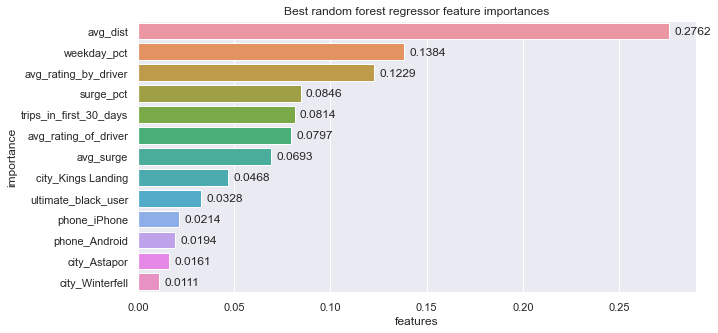

In [122]:
plt.subplots(figsize=(10, 5))

ax = plt.subplot()
sns.set(rc={'figure.figsize':(20,16)})

imps = rf.feature_importances_

df_with_column_names = pd.DataFrame(df_train)
df_with_column_names.columns = ['trips_in_first_30_days',
                     'avg_rating_of_driver','avg_surge','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver','ultimate_black_user','city_Astapor','city_Kings Landing','city_Winterfell','phone_Android','phone_iPhone']



rf_feat_imps = pd.Series(imps, index=df_with_column_names.columns).sort_values(ascending=False)
plots = sns.barplot(y = rf_feat_imps.index, x = rf_feat_imps)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances')

for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

In [ ]:
#Do another model


#look at AVG_

## Conclusion 

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

From my dataset, I first removed all null values, then added a column called 'active' to track if a user was still active on the app. From my calculations 41.1% of the users were still active


2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.

    The accuracy of my model is 74.58%. From the feature importance graph I found that avg_dist is the most important variable when it comes to predicting whether or not a user will remain active 6 months from their start date

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).
